In [76]:
import pandas as pd
import matplotlib.pyplot as plt

TITLE: Sprint 4 Application Project...
The purpose of this project is to test out my strength on common software engineering tasks. I will be developing and deploying a web application to a cloud service so that it is accessible to the public.

In [77]:
df_cars= pd.read_csv('../vehicles_us.csv')

In [78]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [79]:
df_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [80]:
df_cars.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
47412,4999,2005.0,subaru outback,excellent,6.0,gas,187100.0,automatic,SUV,silver,1.0,2018-09-15,9
48184,21900,2015.0,ford explorer,good,6.0,gas,34009.0,automatic,SUV,red,NaN,2018-08-05,45
48322,3200,2005.0,honda accord,good,6.0,gas,326094.0,automatic,coupe,white,NaN,2018-05-21,48
50050,299,2004.0,toyota camry,excellent,4.0,gas,185698.0,automatic,sedan,silver,NaN,2019-02-16,103
15109,12999,2018.0,hyundai elantra,excellent,4.0,gas,24995.0,automatic,other,NaN,NaN,2018-07-10,26


In [81]:
check_dup = df_cars.duplicated().sum()
check_dup


np.int64(0)

checking for duplicates, found none

In [82]:
df_cars['is_4wd'] = df_cars['is_4wd'].fillna(0)
df_cars['is_4wd']

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
51520    0.0
51521    0.0
51522    0.0
51523    0.0
51524    0.0
Name: is_4wd, Length: 51525, dtype: float64

filled missing values is df cars "is_4wd" with a 0

In [83]:
df_cars['paint_color'] = df_cars['paint_color'].fillna('Unknown')
df_cars['paint_color']

0        Unknown
1          white
2            red
3        Unknown
4          black
          ...   
51520      black
51521      white
51522       blue
51523      black
51524    Unknown
Name: paint_color, Length: 51525, dtype: object

filled paint color columns missing value with "unknown"

In [84]:
# df_cars['model_year'].isna().sum()
df_cars['model_year'] = df_cars['model_year'].fillna(df_cars.groupby(['model'])['model_year'].transform('median'))
#df_cars['model_year']
df_cars['model_year'].isna().sum()

np.int64(0)

used group by method to fill in missing values for model year by using the median

In [85]:
df_cars['odometer'] = df_cars['odometer'].fillna(df_cars.groupby(['model_year'])['odometer'].transform('mean'))
df_cars['odometer']
df_cars[df_cars['odometer'].isna()]['model_year']

45694    1929.0
Name: model_year, dtype: float64

used group by method to fill in missing values for odometer by using the mean

In [86]:

df_cars['cylinders'] = df_cars['cylinders'].fillna(df_cars.groupby(['model_year','model'])['odometer'].transform('mean'))
df_cars['cylinders'].isna().sum()

np.int64(0)

used group by method to fill in missing values for cylinders by using the mean

<Axes: title={'center': 'Price range of cars'}, ylabel='Frequency'>

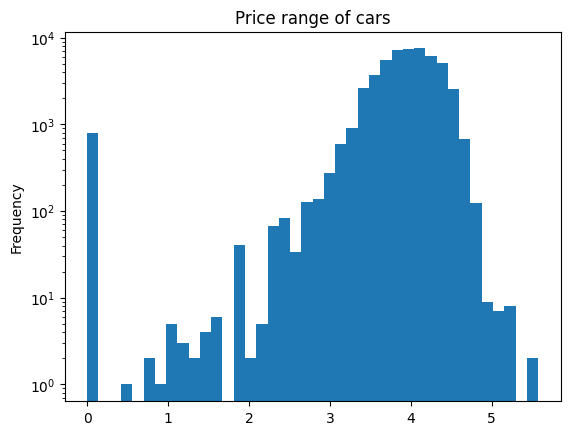

In [87]:
import numpy as np
np.log10(df_cars['price']).plot(kind='hist',bins=40, log = True, title='Price range of cars')

This shows the how many cars are being sold at certain price. The histogram has logorithmic.

<Axes: title={'center': 'Year the car was manufactured quantity'}, ylabel='Frequency'>

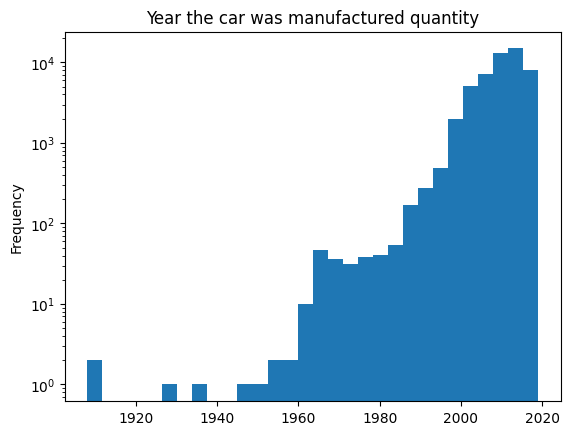

In [88]:
df_cars['model_year'].plot(kind='hist',bins=30, log = True, title='Year the car was manufactured quantity')

THis graph shows how many cars they have based on the year it was manufactured

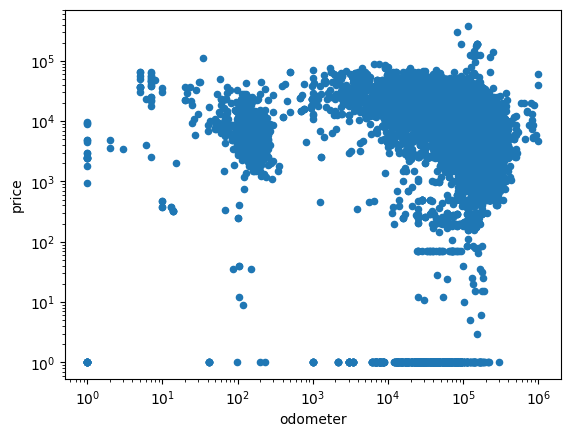

In [89]:
df_cars.plot(kind='scatter',x ='odometer', y= 'price')
plt.xscale('log')
plt.yscale('log')


This graph shows the relationship between price and odometer. THE higher the price the lower the odometer.

Summary: We analyzed the dataframe and plugged in missing values using fillna and groupby. Then we plotted a few histograms and scatterplots to show relationships between some columns.